In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pickle

pd.set_option("display.max_rows", None, "display.max_columns", None,'display.max_colwidth',1)

In [2]:
#import data from pickle file
with open('device_data.pkl', 'rb') as f:
    data = pickle.load(f)
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['IngestedTime'] = pd.to_datetime(data['IngestedTime'])
data.head()

,Timestamp,IngestedTime,PlantId,DeviceId,DTWIN,EDC,VDC,IDC,IAC,VAC,POUT
0,2020-01-10 14:55:00+00:00,2022-05-10 13:01:34,UD73AyeXNWu49Xh1NzTa,p7MveFFAbCT3mJnjpblU,0,"[1.9, 1.78]","[475.6, 446.0]","[7.31, 7.32]",[28.59],[230.6],3.68
1,2020-01-10 15:00:00+00:00,2022-05-10 13:01:34,UD73AyeXNWu49Xh1NzTa,p7MveFFAbCT3mJnjpblU,0,"[284.32, 267.01]","[475.6, 446.0]","[7.31, 7.32]",[28.59],[230.6],551.34
2,2020-01-10 15:05:00+00:00,2022-05-10 13:01:34,UD73AyeXNWu49Xh1NzTa,p7MveFFAbCT3mJnjpblU,0,"[233.53, 218.69]","[470.2, 441.6]","[6.15, 6.13]",[23.86],[229.1],452.22
3,2020-01-10 15:10:00+00:00,2022-05-10 13:01:34,UD73AyeXNWu49Xh1NzTa,p7MveFFAbCT3mJnjpblU,0,"[205.59, 192.68]","[480.1, 451.0]","[6.92, 6.9]",[27.47],[229.3],398.27
4,2020-01-10 15:15:00+00:00,2022-05-10 13:01:34,UD73AyeXNWu49Xh1NzTa,p7MveFFAbCT3mJnjpblU,0,"[222.48, 209.33]","[476.59, 448.49]","[6.89, 6.88]",[27.16],[229.0],431.81


In [3]:
#import data from task1 csv files
df1 = pd.read_csv('data_TUNbvqK39a7iNY2b31vN.csv')
df2 = pd.read_csv('data_gdBuQRjnnd0MlBkFM5Bq.csv')

#concatenate df1 and df2
df_concat= pd.concat([df1,df2],ignore_index=True)

#change data type of Timestamp to datime64[ns]
df_concat['Timestamp'] = pd.to_datetime(df_concat['Timestamp'])

#remove duplicates and reset index
df_concat = df_concat.drop_duplicates().reset_index(drop=True)

df_concat.head()

,Timestamp,GHI,DHI,DNI,TAMB,WDSP,plantId,deviceId,plantName,inverterId,config,MPPTShapes_1,tilt_1,azimuth_1,apparent_zenith,zenith,apparent_elevation,azimuth,equation_of_time,POA,G_eff,T_cell
0,2020-01-01 00:00:00+00:00,0.0,0.0,0.0,26.3125,1.279297,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station,Another Plant,TUNbvqK39a7iNY2b31vN,2,17.0,8.0,270.0,114.662906,114.662906,-24.662906,228.617464,-3.081724,0.0,0.0,26.3125
1,2020-01-01 00:00:00+00:00,0.0,0.0,0.0,26.3125,1.279297,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station,Another Plant,TUNbvqK39a7iNY2b31vN,2,19.0,8.0,270.0,114.662906,114.662906,-24.662906,228.617464,-3.081724,0.0,0.0,26.3125
2,2020-01-01 00:00:00+00:00,0.0,0.0,0.0,26.3125,1.279297,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station,19#1280 - Artbel,TUNbvqK39a7iNY2b31vN,2,17.0,8.0,270.0,114.662906,114.662906,-24.662906,228.617464,-3.081724,0.0,0.0,26.3125
3,2020-01-01 00:00:00+00:00,0.0,0.0,0.0,26.3125,1.279297,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station,19#1280 - Artbel,TUNbvqK39a7iNY2b31vN,2,19.0,8.0,270.0,114.662906,114.662906,-24.662906,228.617464,-3.081724,0.0,0.0,26.3125
4,2020-01-01 01:00:00+00:00,0.0,0.0,0.0,25.8750,0.950195,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station,Another Plant,TUNbvqK39a7iNY2b31vN,2,17.0,8.0,270.0,124.091184,124.091184,-34.091184,217.037526,-3.101587,0.0,0.0,25.8750


In [4]:
#left merge data and df_concat by Timestamp, DeviceId, and PlantId
df = data.merge(df_concat,how='left',left_on=['Timestamp','DeviceId','PlantId'],right_on=['Timestamp','inverterId','plantId'])

#drop rows with NA in columns POA and G_eff
df = df.dropna(subset=['POA','G_eff']).reset_index(drop=True)
df.head()

,Timestamp,IngestedTime,PlantId,DeviceId,DTWIN,EDC,VDC,IDC,IAC,VAC,POUT,GHI,DHI,DNI,TAMB,WDSP,plantId,deviceId,plantName,inverterId,config,MPPTShapes_1,tilt_1,azimuth_1,apparent_zenith,zenith,apparent_elevation,azimuth,equation_of_time,POA,G_eff,T_cell
0,2020-03-16 19:00:00+00:00,2022-05-10 15:04:26,3Xn5nwPrHuQaylpeqYLY,TUNbvqK39a7iNY2b31vN,0,NaN,[628.88],[20.18],"[13.81, 13.82, 13.8]","[240.46, 241.46, 238.66]",834.06,284.6978,164.7697,282.0839,30.28125,2.115234,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station,Another Plant,TUNbvqK39a7iNY2b31vN,2.0,17.0,8.0,270.0,58.218440,58.245506,31.781560,283.362017,-8.413944,343.905742,345.799317,48.852160
1,2020-03-16 19:00:00+00:00,2022-05-10 15:04:26,3Xn5nwPrHuQaylpeqYLY,TUNbvqK39a7iNY2b31vN,0,NaN,[628.88],[20.18],"[13.81, 13.82, 13.8]","[240.46, 241.46, 238.66]",834.06,284.6978,164.7697,282.0839,30.28125,2.115234,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station,Another Plant,TUNbvqK39a7iNY2b31vN,2.0,19.0,8.0,270.0,58.218440,58.245506,31.781560,283.362017,-8.413944,343.905742,345.799317,48.852160
2,2020-03-16 19:00:00+00:00,2022-05-10 15:04:26,3Xn5nwPrHuQaylpeqYLY,TUNbvqK39a7iNY2b31vN,0,NaN,[628.88],[20.18],"[13.81, 13.82, 13.8]","[240.46, 241.46, 238.66]",834.06,284.6978,164.7697,282.0839,30.28125,2.115234,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station,19#1280 - Artbel,TUNbvqK39a7iNY2b31vN,2.0,17.0,8.0,270.0,58.218440,58.245506,31.781560,283.362017,-8.413944,343.905742,345.799317,48.852160
3,2020-03-16 19:00:00+00:00,2022-05-10 15:04:26,3Xn5nwPrHuQaylpeqYLY,TUNbvqK39a7iNY2b31vN,0,NaN,[628.88],[20.18],"[13.81, 13.82, 13.8]","[240.46, 241.46, 238.66]",834.06,284.6978,164.7697,282.0839,30.28125,2.115234,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station,19#1280 - Artbel,TUNbvqK39a7iNY2b31vN,2.0,19.0,8.0,270.0,58.218440,58.245506,31.781560,283.362017,-8.413944,343.905742,345.799317,48.852160
4,2020-03-16 20:00:00+00:00,2022-05-10 15:04:26,3Xn5nwPrHuQaylpeqYLY,TUNbvqK39a7iNY2b31vN,0,NaN,[617.9],[12.74],"[8.98, 9.0, 8.97]","[236.3, 237.1, 234.9]",526.24,115.5463,67.5456,222.6212,29.62500,1.589844,3Xn5nwPrHuQaylpeqYLY,virtual-weather-station,Another Plant,TUNbvqK39a7iNY2b31vN,2.0,17.0,8.0,270.0,71.819701,71.870101,18.180299,276.416151,-8.401984,165.392985,163.511372,38.556221


In [5]:
#Create new dataframe with new columns
df_new = df[(df.columns[:11]).to_list() + (df.columns[-3:-1]).to_list()]
df_new.head()

,Timestamp,IngestedTime,PlantId,DeviceId,DTWIN,EDC,VDC,IDC,IAC,VAC,POUT,POA,G_eff
0,2020-03-16 19:00:00+00:00,2022-05-10 15:04:26,3Xn5nwPrHuQaylpeqYLY,TUNbvqK39a7iNY2b31vN,0,NaN,[628.88],[20.18],"[13.81, 13.82, 13.8]","[240.46, 241.46, 238.66]",834.06,343.905742,345.799317
1,2020-03-16 19:00:00+00:00,2022-05-10 15:04:26,3Xn5nwPrHuQaylpeqYLY,TUNbvqK39a7iNY2b31vN,0,NaN,[628.88],[20.18],"[13.81, 13.82, 13.8]","[240.46, 241.46, 238.66]",834.06,343.905742,345.799317
2,2020-03-16 19:00:00+00:00,2022-05-10 15:04:26,3Xn5nwPrHuQaylpeqYLY,TUNbvqK39a7iNY2b31vN,0,NaN,[628.88],[20.18],"[13.81, 13.82, 13.8]","[240.46, 241.46, 238.66]",834.06,343.905742,345.799317
3,2020-03-16 19:00:00+00:00,2022-05-10 15:04:26,3Xn5nwPrHuQaylpeqYLY,TUNbvqK39a7iNY2b31vN,0,NaN,[628.88],[20.18],"[13.81, 13.82, 13.8]","[240.46, 241.46, 238.66]",834.06,343.905742,345.799317
4,2020-03-16 20:00:00+00:00,2022-05-10 15:04:26,3Xn5nwPrHuQaylpeqYLY,TUNbvqK39a7iNY2b31vN,0,NaN,[617.9],[12.74],"[8.98, 9.0, 8.97]","[236.3, 237.1, 234.9]",526.24,165.392985,163.511372


In [6]:
df_new['DeviceId'].value_counts()

TUNbvqK39a7iNY2b31vN    30848
gdBuQRjnnd0MlBkFM5Bq    16064
Name: DeviceId, dtype: int64

In [7]:
#Cheack for missing values
df_new.isna().sum()

Timestamp       0    
IngestedTime    0    
PlantId         0    
DeviceId        0    
DTWIN           0    
EDC             30848
VDC             0    
IDC             0    
IAC             0    
VAC             0    
POUT            0    
POA             0    
G_eff           0    
dtype: int64

In [8]:
#function to clean data
def clean_data(col='EDC'):
    #create a copy from df_new
    data = df_new.copy()
    
    #drop unused columns for analysis
    data = data.drop(columns=['Timestamp','IngestedTime','PlantId','DTWIN','IAC','VAC'])
    
    #fill na values with 0 values in EDC column
    data[col] = data[col].fillna(0)
    
    #getting the mean values for the following values of the columns and its sublist
    #round values for each columns to have a smooth graph using line plot
    feat = ['EDC','VDC','IDC','POUT','POA','G_eff']
    for j in feat:
        data[j] = [round(np.mean(i)) for i in data[j].to_list()]
        
    return data

In [9]:
clean_data().head()

,DeviceId,EDC,VDC,IDC,POUT,POA,G_eff
0,TUNbvqK39a7iNY2b31vN,0,629,20,834,344,346
1,TUNbvqK39a7iNY2b31vN,0,629,20,834,344,346
2,TUNbvqK39a7iNY2b31vN,0,629,20,834,344,346
3,TUNbvqK39a7iNY2b31vN,0,629,20,834,344,346
4,TUNbvqK39a7iNY2b31vN,0,618,13,526,165,164


In [10]:
#function for boxplot
def boxplot(data):
    fig, ax = plt.subplots(1, figsize=(15,5))
    data.plot(ax=ax,kind='box', vert=False)

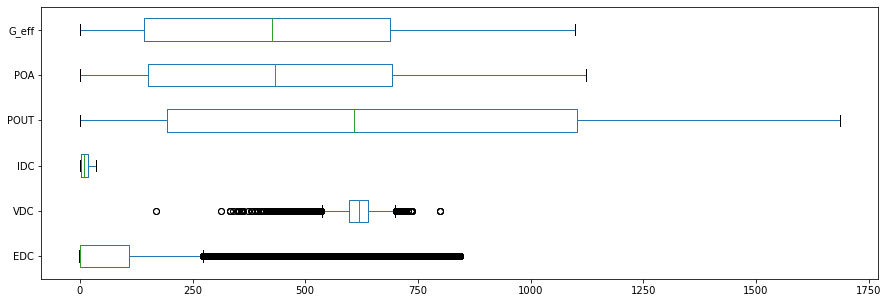

In [11]:
boxplot(clean_data())

In [12]:
#Creating a boxplot and histogram plot for each column
def boxhist_plot(data, feat):
    fig, (ax_box,ax_hist) = plt.subplots(2,figsize=(15,5),sharex=True,gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(ax=ax_box, data=data, x=feat)
    sns.histplot(ax=ax_hist, data=data, x=feat,kde=True)

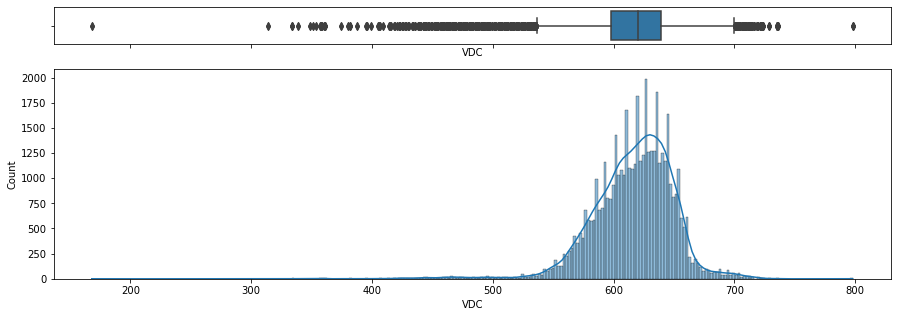

In [13]:
boxhist_plot(clean_data(),'VDC')

In [14]:
#function for dropping outliers in VDC column
def no_outliers():
    data = clean_data()
    index_list = []
    col = ['VDC']
    for ft in col:
        Q1, Q3 = data[ft].quantile([0.25,0.75])
        IQR = Q3 - Q1
        high = Q3 + 1.5 * IQR
        low = Q1 - 1.5 * IQR
        mask = data[ft].between(low, high)
        index_list.extend(data[~mask].index)
    data= data.drop(index_list)
    return data

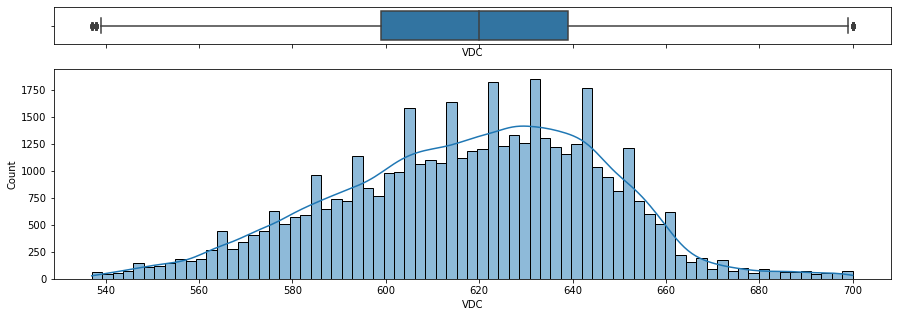

In [15]:
boxhist_plot(no_outliers(),'VDC')

In [16]:
#function for scatterplot
x = ['EDC','VDC','IDC','POUT']
y= 'G_eff'
def graph_scatter(data,x,y):
    fig, ax = plt.subplots(1,4, figsize=(35,10),sharey=True)
    for xx in x:
        sns.scatterplot(ax=ax[x.index(xx)], x=xx, y=y,data=data,hue='DeviceId',alpha=0.5)
        ax[x.index(xx)].set_xlabel(xx)
        ax[x.index(xx)].set_ylabel (y);

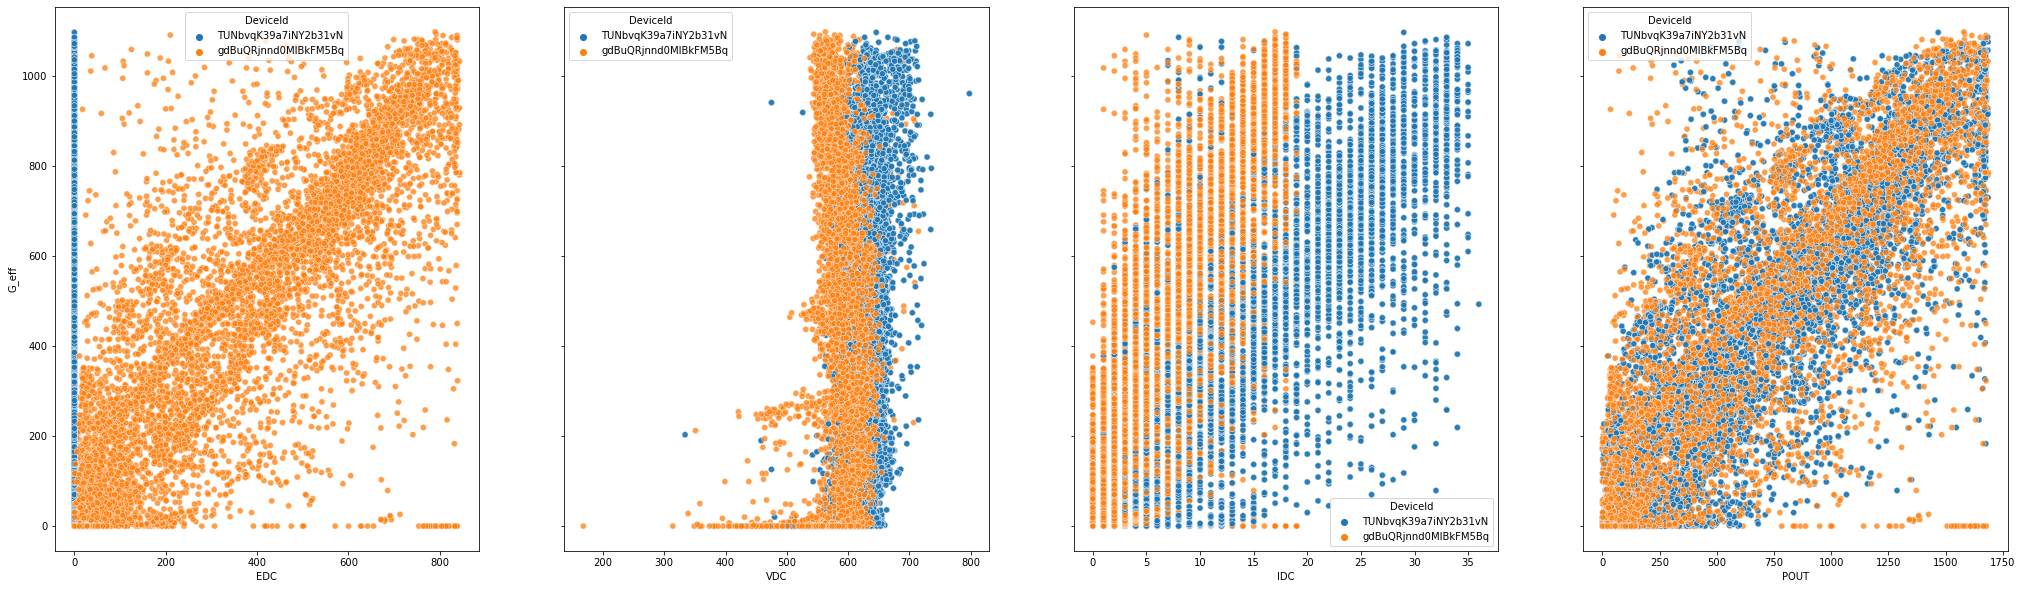

In [17]:
graph_scatter(clean_data(),x,y)

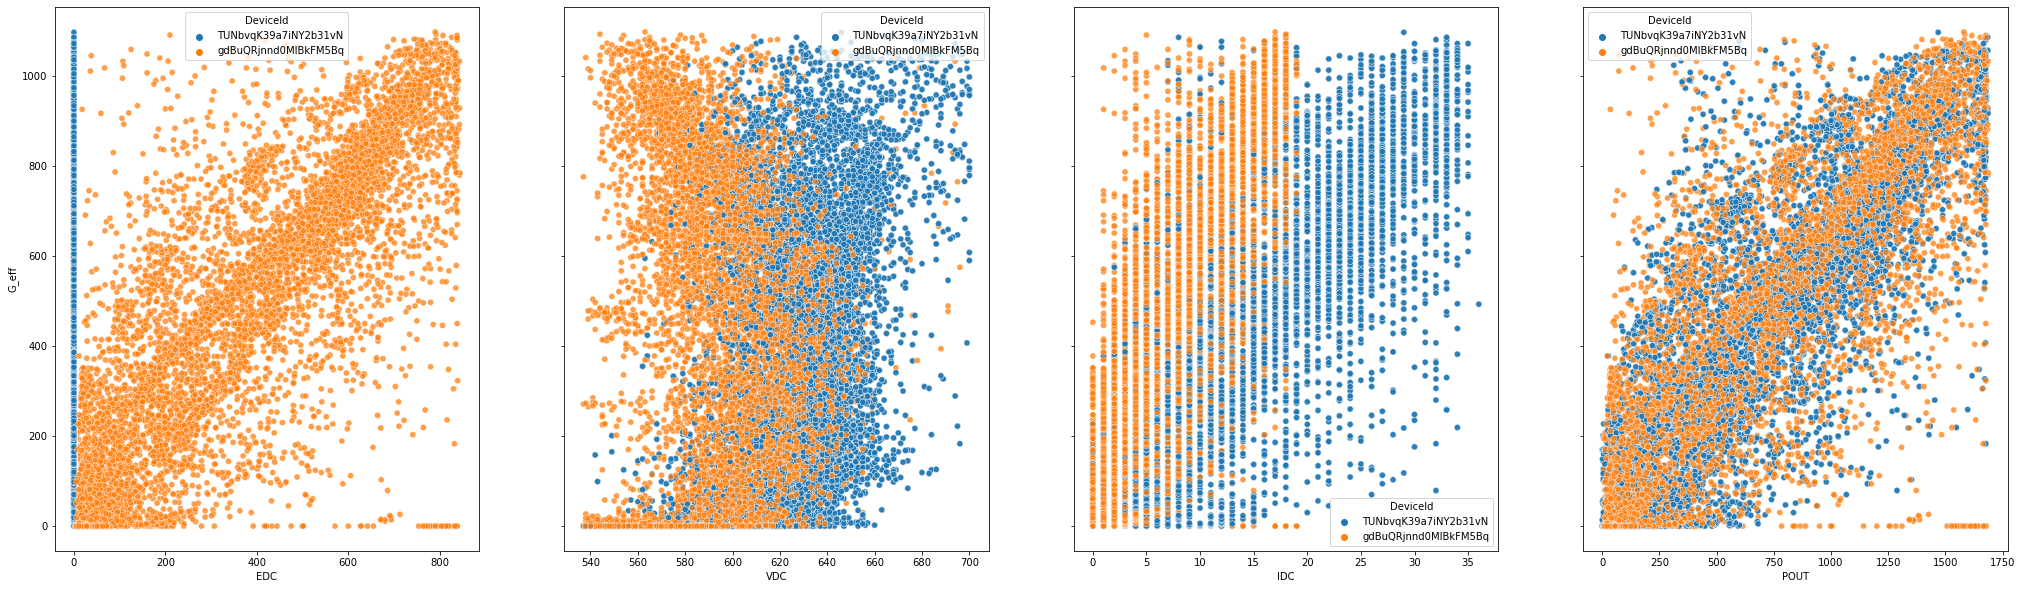

In [18]:
graph_scatter(no_outliers(),x,y)

In [19]:
#function for lineplot with device id category
def graph_line(data,x,y):
    fig, ax = plt.subplots(1,4, figsize=(35,10),sharey=True)
    for xx in x:
        sns.lineplot(ax=ax[x.index(xx)], x=xx, y=y,data=data,hue='DeviceId',alpha=0.5)
        ax[x.index(xx)].set_xlabel(xx)
        ax[x.index(xx)].set_ylabel (y);

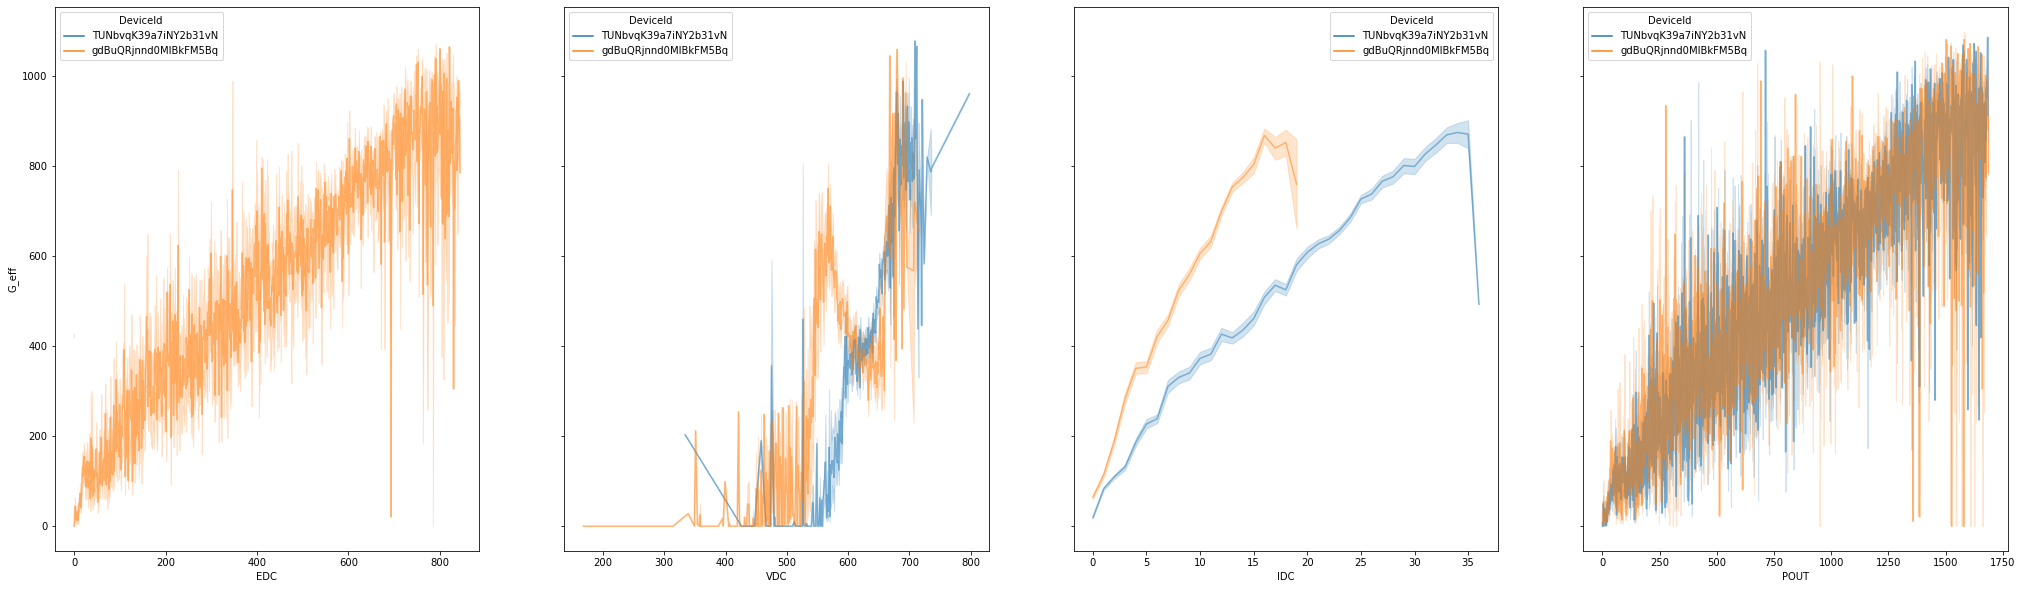

In [20]:
graph_line(clean_data(),x,y)

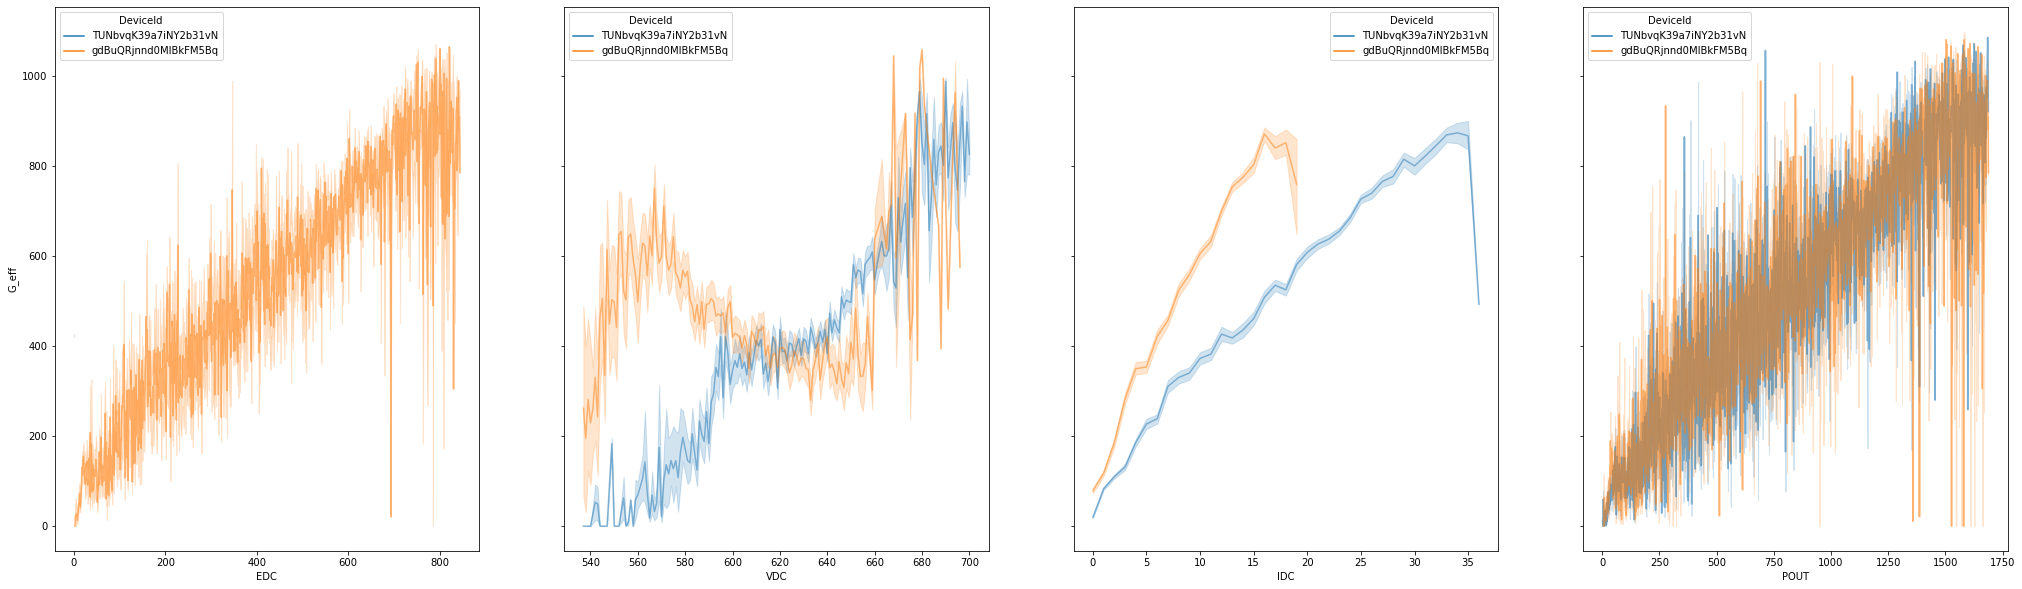

In [21]:
graph_line(no_outliers(),x,y)

In [22]:
no_outliers()['DeviceId'].value_counts()

TUNbvqK39a7iNY2b31vN    30400
gdBuQRjnnd0MlBkFM5Bq    15442
Name: DeviceId, dtype: int64

In [23]:
#variable assignment for device id for the function below
d1 = df_new['DeviceId'].value_counts().index[0]
d2 = df_new['DeviceId'].value_counts().index[1]

#function for slicing dataframe by device id
def device_data(device_id):
    data = no_outliers()
    data = data[data['DeviceId']==device_id].reset_index(drop=True)
    return data

In [57]:
device_data(d1).head()

,DeviceId,EDC,VDC,IDC,POUT,POA,G_eff
0,TUNbvqK39a7iNY2b31vN,0,629,20,834,344,346
1,TUNbvqK39a7iNY2b31vN,0,629,20,834,344,346
2,TUNbvqK39a7iNY2b31vN,0,629,20,834,344,346
3,TUNbvqK39a7iNY2b31vN,0,629,20,834,344,346
4,TUNbvqK39a7iNY2b31vN,0,618,13,526,165,164


In [40]:
#function for line plot for every device id
def device_plot(device_id,x,y):
    data = device_data(device_id)
    fig, ax = plt.subplots(1, figsize=(15,5))    
    sns.lineplot(ax=ax, x=x, y=y,data=data)
    ax.set_xlabel(x)
    ax.set_ylabel (y)
    ax.set_title('Device Id: '+device_id)
    #plt.savefig("Task2_"+y+" vs "+x+"_"+device_id);

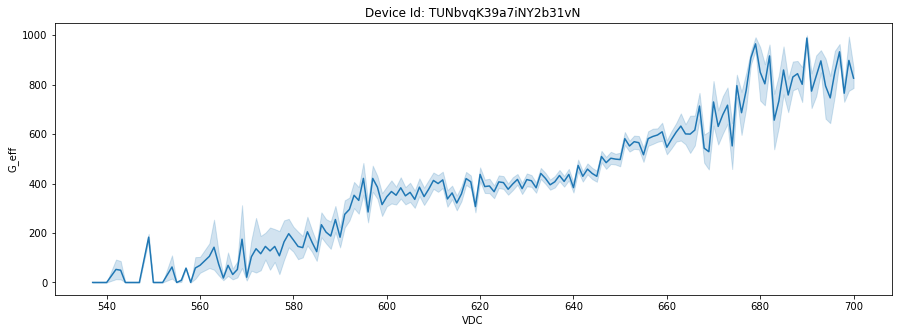

In [62]:
#plot for device_id: TUNbvqK39a7iNY2b31vN 
device_plot(d1,'VDC','G_eff')

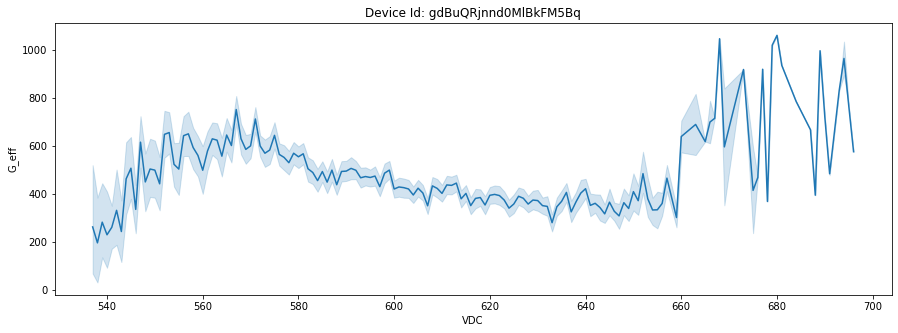

In [63]:
#plot for device_id: gdBuQRjnnd0MlBkFM5Bq
device_plot(d2,'VDC','G_eff')

In [48]:
#importing data to csv file with the following columns
def data_csv(device_id):
    data = device_data(device_id)
    data.columns = ['DeviceId','Energy', 'V', 'I', 'P','POA','G_eff']
    data = data[['POA','V','I','P','Energy']]
    file = "Task2_"+device_id+".csv"
    data.to_csv(file, index=False)
    return data

In [50]:
data_csv(d2).head()

,POA,V,I,P,Energy
0,301,602,1,54,27
1,301,602,1,54,27
2,549,590,2,170,85
3,549,590,2,170,85
4,769,695,4,316,158
